# Import Libraries

In [19]:
import cv2,time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# Load and display Image

In [21]:
# Load and read the image in grayscale
imagePath='Images/threshold.png'
srcImg=cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)

In [22]:
# Set threshold value
thresh=100
# Set max value
maxVal=255

# In the code below, thresholding is performed using three different techniquies and performance is compared

Thresholding using for loops

Time taken in thresholding=2.2281599044799805 seconds


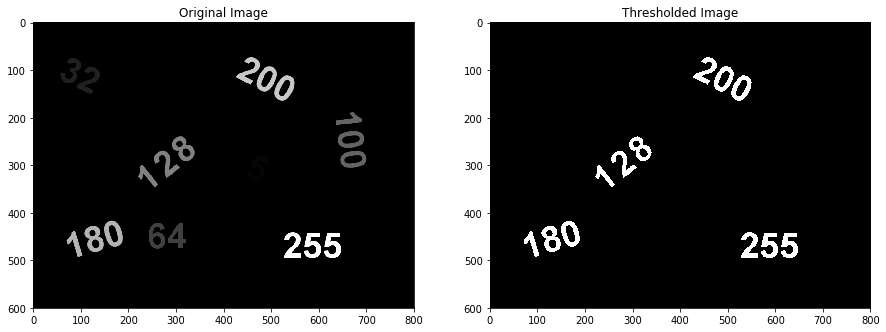

In [23]:
def thresholdUsingForLoop(src,threshold,maxVal):
    # Create output image
    dst=srcImg.copy()
    height,width=src.shape[:2]
    
    # Loop over rows
    for i in range(height):
        # Loop over columns
        for j in range(width):
            if(src[i,j]>threshold):
                dst[i,j]=maxVal
            else:
                dst[i,j]=0
    return dst

# Calculate the time taken for thresholding
t=time.time()
dstImg=thresholdUsingForLoop(srcImg,thresh,maxVal)
print("Time taken in thresholding={} seconds".format(time.time()-t))

# Display
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(srcImg);plt.title("Original Image");
plt.subplot(122);plt.imshow(dstImg);plt.title("Thresholded Image");

Let's improve the execution time.
Thresholding using Vectorized operation:

Time taken in thresholding=0.0019750595092773438 seconds


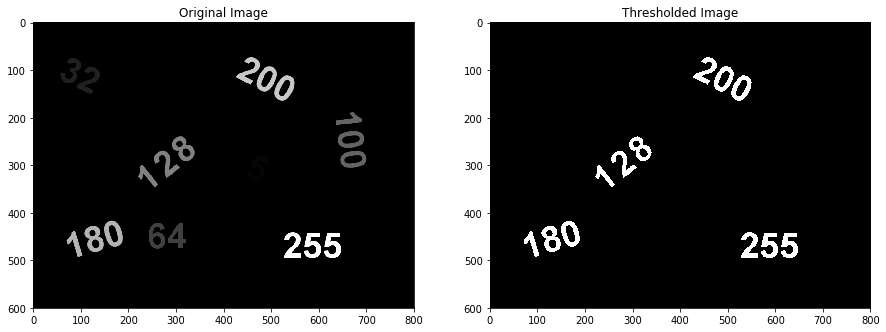

In [24]:
def thresholdUsingVectors(src,threshold,maxVal):
    # Create a black output image
    dst=np.zeros_like(srcImg)
    
    # Find pixels having value > threshold value
    thresholdPixels=src>threshold
    
    # Assign max values to those pixels
    dst[thresholdPixels]=maxVal
    
    return dst

# Calculate the time taken for thresholding
t=time.time()
dstImg=thresholdUsingVectors(srcImg,thresh,maxVal)
print("Time taken in thresholding={} seconds".format(time.time()-t))

# Display
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(srcImg);plt.title("Original Image");
plt.subplot(122);plt.imshow(dstImg);plt.title("Thresholded Image");

Thresholding using OpenCV function:

Time taken = 0.000576019287109375 seconds


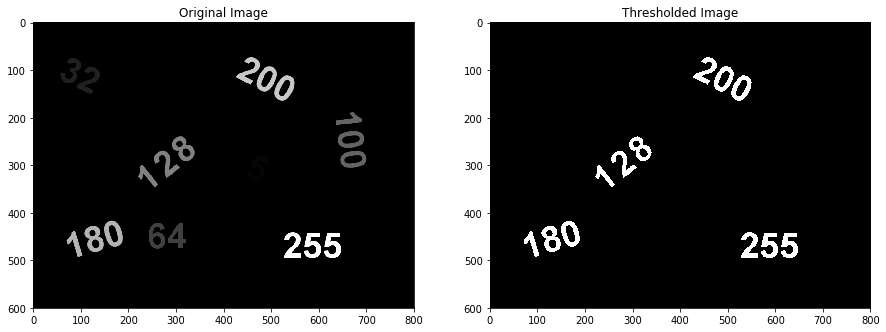

In [32]:
t=time.time()
th,dstImg=cv2.threshold(srcImg,thresh,maxVal,cv2.THRESH_BINARY)
print("Time taken = {} seconds".format(time.time() - t))

cv2.imwrite("thresholdedImage.jpg",dstImg)
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(srcImg);plt.title("Original Image");
plt.subplot(122);plt.imshow(dstImg);plt.title("Thresholded Image");

# Runtime Comparison of three techniques used above

In [30]:
time_opencv = 0
time_loops = 0
time_vector = 0
n_samples = 20
for i in range(n_samples):
    
    t = time.time()
    dstImg = thresholdUsingForLoop(srcImg, thresh, maxVal)
    time_loops += time.time() - t
    
    t = time.time()
    dstImg = thresholdUsingVectors(srcImg, thresh, maxVal)
    time_vector += time.time() - t
    
    t = time.time()
    th, dstImg = cv2.threshold(srcImg, thresh, maxVal, cv2.THRESH_BINARY)
    time_opencv += time.time() - t

print("Average time taken by For Loop Code = {} seconds".format(time_loops/n_samples))
print("Average time taken by Vectorized Code = {} seconds".format(time_vector/n_samples))
print("Average time taken by OpenCV Code = {} seconds".format(time_opencv/n_samples))

Average time taken by For Loop Code = 1.9648812532424926 seconds
Average time taken by Vectorized Code = 0.00030744075775146484 seconds
Average time taken by OpenCV Code = 9.509325027465821e-05 seconds
